In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone "https://github.com/anvarnarz/praktikum_datasets.git"

Cloning into 'praktikum_datasets'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 139 (delta 44), reused 43 (delta 43), pack-reused 93
Receiving objects: 100% (139/139), 9.71 MiB | 6.30 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [3]:
url = "/content/praktikum_datasets/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
%matplotlib inline
sns.pairplot(df[['Outcome', 'Glucose', 'BMI', "Age", "Pregnancies", "DiabetesPedigreeFunction", "Insulin"]]) #P.S. Non Linear Regression
plt.show()

In [5]:
df.corr().abs().style.background_gradient(cmap='Blues') #Corralation matrix chart

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False) #Corralation simple form

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [7]:
df.Outcome.value_counts() #almost double times difference between positive and negative outcomes from diabetes 

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [29]:
#Standardizing the data values into a standard format
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)   

In [30]:
#Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=21)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(x_train, y_train) #training the test sets

KNeighborsClassifier(n_neighbors=17)

**Find best "k" value**

In [32]:
#Find the best "k" value via sklearn (GridSearchCV)
from sklearn.model_selection import GridSearchCV 

param_grid = {'n_neighbors' : np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [33]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [34]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [ ]:
#nn_gscv.best_estimator_

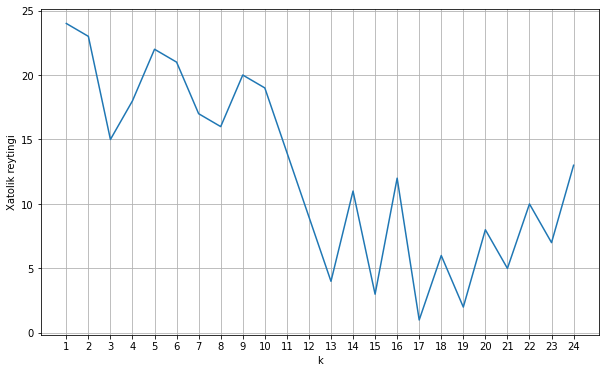

In [37]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

**Prediction**

In [42]:
y_predict = knn.predict(x_test) #predicting y values

**Evaluation of the Model**

In [43]:
#Jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.34782608695652173

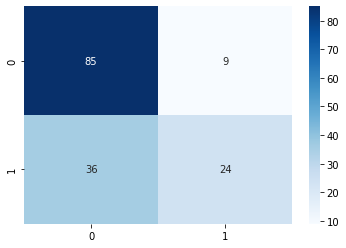

In [63]:
#Confusion Martix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), cmap="Blues", annot=True)
plt.show()

In [64]:
confusion_matrix(y_test, y_predict)

array([[85,  9],
       [36, 24]])

In [83]:
#manual precision, f1, recall, accuracy reports
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score 
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print(f"{precision=} \n{f1=} \n{recall=}, \n{accuracy=}")

precision=0.7272727272727273 
f1=0.5161290322580645 
recall=0.4, 
accuracy=0.7077922077922078


In [84]:
#Classification report by using sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        94
           1       0.73      0.40      0.52        60

    accuracy                           0.71       154
   macro avg       0.71      0.65      0.65       154
weighted avg       0.71      0.71      0.68       154



**Cross Validation**

In [89]:
#Cross Validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=x, y=y, cv=5)

#Cross Validation Evaluation
print(classification_report(y, predict))



              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.53      0.61       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.72       768
weighted avg       0.76      0.77      0.76       768

